In [1]:
import os
import scanpy as sc
import diopy
new_directory = "~/DSCT/src/"
os.chdir(new_directory)
import DSCT_load
import DSCT_train

In [2]:
import time
anno='cluster'
use_select=False
gene_number2=100
train_num=300
    
for num_name in ['36']:
# for num_name in ['36','37']:
    print(num_name)
    result_save_path="~/"
    model_save_path="~/"
    plot_save_path="~/"
    #data
    sc_obj=sc.read_h5ad("~/WMB-10Xv3-HPF-DSCT.h5ad")
    sc_obj.var_names = sc_obj.var_names.astype(str)
    sc_obj.var_names_make_unique()

    st_obj=sc.read_h5ad("~/HPF_region_"+num_name+".h5ad")
    st_obj.var_names = st_obj.var['gene_symbol'].astype(str)
    st_obj.var_names_make_unique()
    sc.pp.filter_cells(st_obj, min_counts=20)
    sc.pp.filter_genes(st_obj, min_cells=20)

    print(anno)
    sc_data=sc_obj
    num_classes = len(set(sc_data.obs[anno]))
    st_data=st_obj

    print("start")
    #start time
    start_time = time.time()
    sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number2,use_select)
    DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,plot_save_path,train_num,num_classes,anno)
    end_time = time.time()
    time_diff = end_time-start_time
    print(time_diff)
    #end time


36


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


cluster
start


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:48: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


Epoch [10/300], Loss: 2.8558
Epoch [20/300], Loss: 1.8074
Epoch [30/300], Loss: 1.4142
Epoch [40/300], Loss: 1.1085
Epoch [50/300], Loss: 0.9607
Epoch [60/300], Loss: 0.9140
Epoch [70/300], Loss: 0.7435
Epoch [80/300], Loss: 0.7325
Epoch [90/300], Loss: 0.6633
Epoch [100/300], Loss: 0.5990
Epoch [110/300], Loss: 0.5885
Epoch [120/300], Loss: 0.5389
Epoch [130/300], Loss: 0.5087
Epoch [140/300], Loss: 0.4791
Epoch [150/300], Loss: 0.4722
Epoch [160/300], Loss: 0.4385
Epoch [170/300], Loss: 0.4506
Epoch [180/300], Loss: 0.4108
Epoch [190/300], Loss: 0.3916
Epoch [200/300], Loss: 0.4139
Epoch [210/300], Loss: 0.3792
Epoch [220/300], Loss: 0.3645
Epoch [230/300], Loss: 0.3534
Epoch [240/300], Loss: 0.3570
Epoch [250/300], Loss: 0.3444
Epoch [260/300], Loss: 0.3313
Epoch [270/300], Loss: 0.3260
Epoch [280/300], Loss: 0.3227
Epoch [290/300], Loss: 0.3100
Epoch [300/300], Loss: 0.3121
21.14323329925537


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1067: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


<Figure size 1500x1500 with 0 Axes>

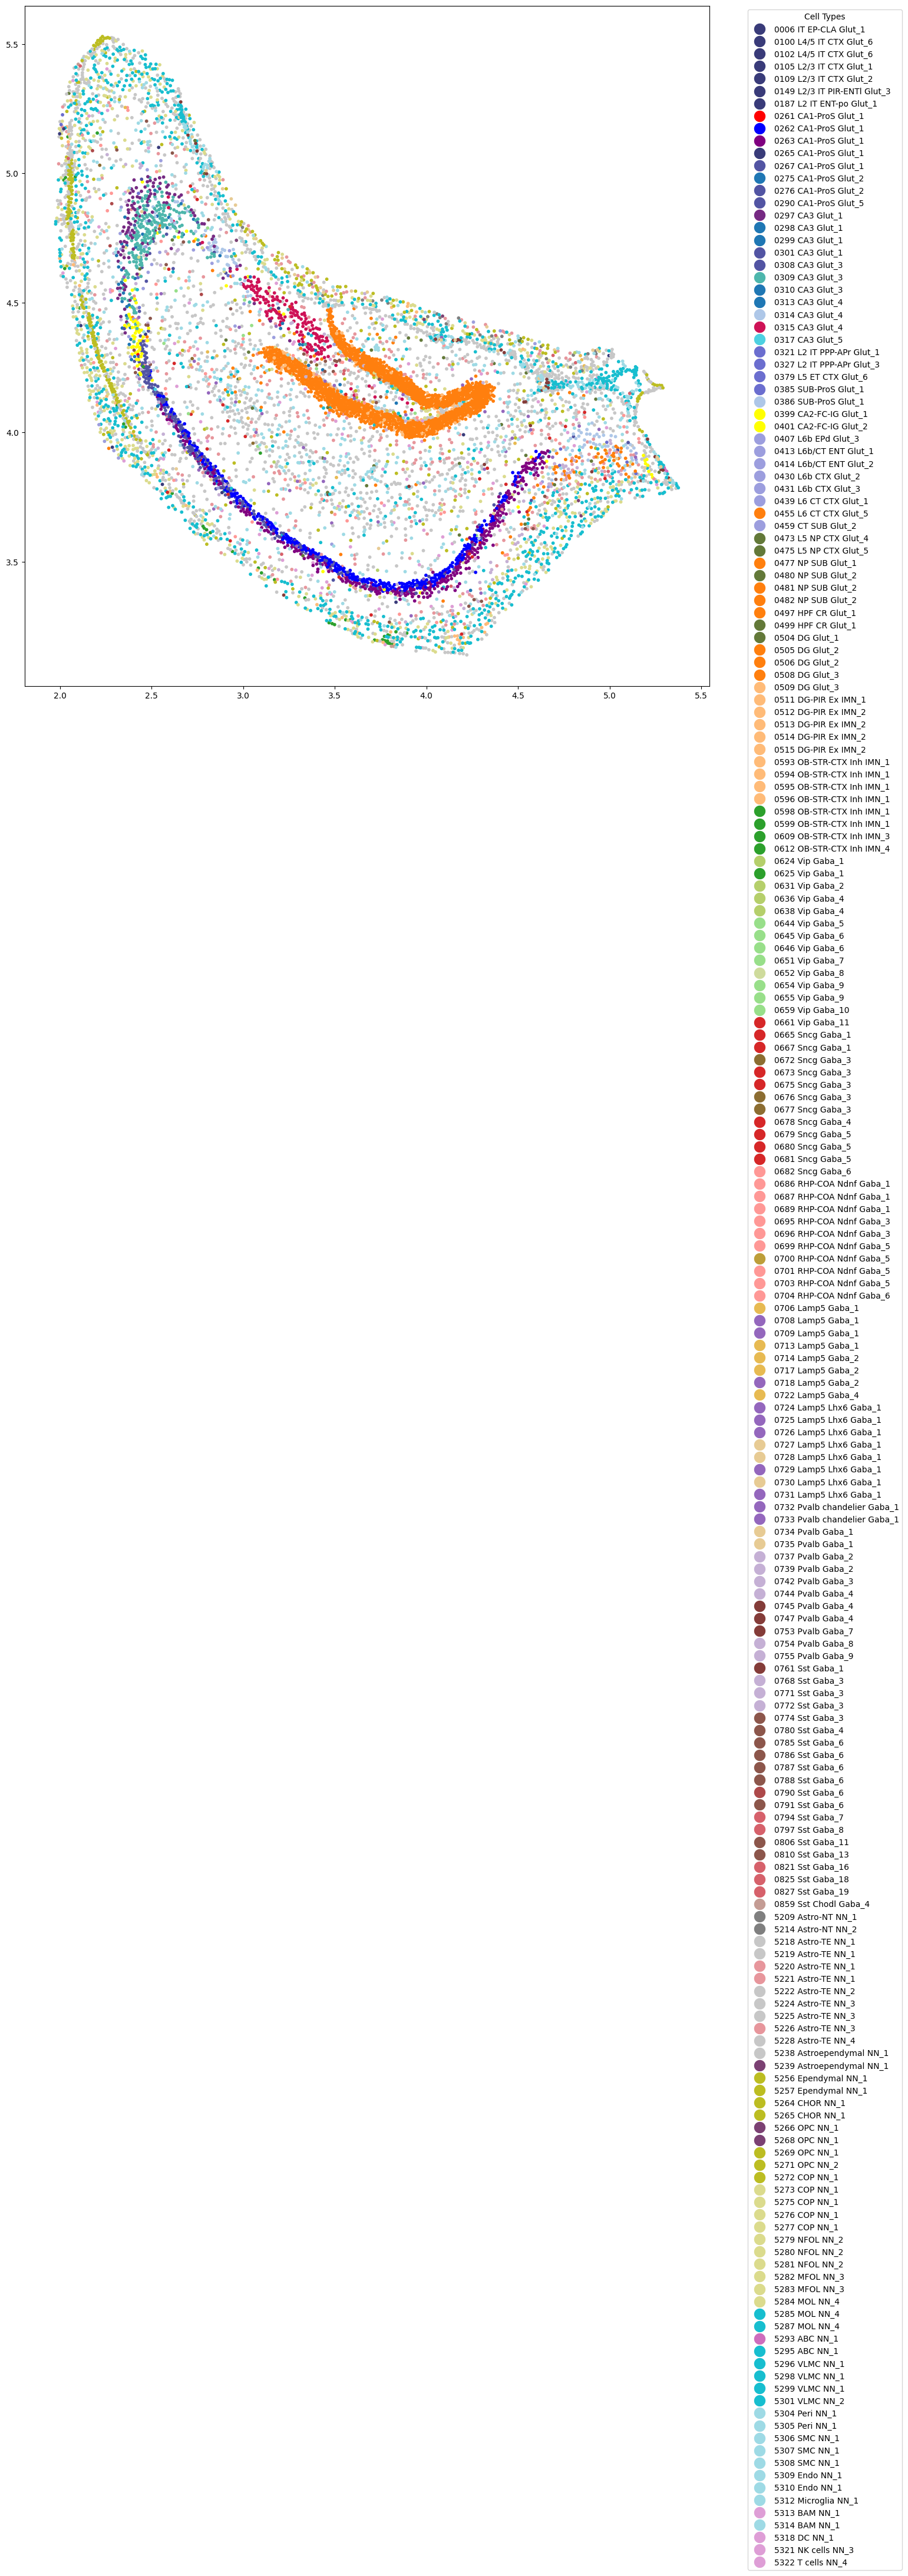

In [5]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

predicted_labels = st_data.obs['predicted_classes']
unique_clusters = np.unique(st_data.obs['cluster'])
unique_predictions = np.unique(st_data.obs['predicted_classes'])

cmap_clusters = plt.get_cmap('tab20', len(unique_clusters))
cmap_predictions = plt.get_cmap('tab20b', len(unique_predictions))  # 使用不同的颜色映射确保多样性

color_map = {label: cmap_clusters(i) for i, label in enumerate(unique_clusters)}
color_map.update({label: cmap_predictions(i) for i, label in enumerate(unique_predictions) if label not in color_map})

special_colors = {
    '0261 CA1-ProS Glut_1': 'red',
    '0262 CA1-ProS Glut_1': 'blue',
    '0263 CA1-ProS Glut_1': 'purple',
    '0399 CA2-FC-IG Glut_1': 'yellow',
    '0401 CA2-FC-IG Glut_2': 'yellow',
    '0297 CA3 Glut_1': '#762A83',
    '0309 CA3 Glut_3': '#4DB6AC',
    '0315 CA3 Glut_4': '#CE1256',
    '0317 CA3 Glut_5': '#4DD0E1'
}
color_map.update(special_colors)

colors = [color_map[label] for label in st_data.obs['predicted_classes']]
subset_color_map = {label: color_map[label] for label in unique_predictions if label in color_map}

coor_x = st_data.obs['x']
coor_y = st_data.obs['y']

plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=10)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in subset_color_map.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [6]:
import time
anno='cluster'
use_select=False
gene_number2=100
train_num=300
    
for num_name in ['37']:
# for num_name in ['36','37']:
    print(num_name)
    result_save_path="~/"
    model_save_path="~/"
    plot_save_path="~/"
    #data
    sc_obj=sc.read_h5ad("~/WMB-10Xv3-HPF-DSCT.h5ad")
    sc_obj.var_names = sc_obj.var_names.astype(str)
    sc_obj.var_names_make_unique()

    st_obj=sc.read_h5ad("~/HPF_region_"+num_name+".h5ad")
    st_obj.var_names = st_obj.var['gene_symbol'].astype(str)
    st_obj.var_names_make_unique()
    sc.pp.filter_cells(st_obj, min_counts=20)
    sc.pp.filter_genes(st_obj, min_cells=20)

    print(anno)
    sc_data=sc_obj
    num_classes = len(set(sc_data.obs[anno]))
    st_data=st_obj

    print("start")
    #start time
    start_time = time.time()
    sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number2,use_select)
    DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,plot_save_path,train_num,num_classes,anno)
    end_time = time.time()
    time_diff = end_time-start_time
    print(time_diff)
    #end time


37


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


cluster
start


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:48: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


Epoch [10/300], Loss: 2.8558
Epoch [20/300], Loss: 1.8074
Epoch [30/300], Loss: 1.4142
Epoch [40/300], Loss: 1.1085
Epoch [50/300], Loss: 0.9607
Epoch [60/300], Loss: 0.9140
Epoch [70/300], Loss: 0.7435
Epoch [80/300], Loss: 0.7325
Epoch [90/300], Loss: 0.6633
Epoch [100/300], Loss: 0.5990
Epoch [110/300], Loss: 0.5885
Epoch [120/300], Loss: 0.5389
Epoch [130/300], Loss: 0.5087
Epoch [140/300], Loss: 0.4791
Epoch [150/300], Loss: 0.4722
Epoch [160/300], Loss: 0.4385
Epoch [170/300], Loss: 0.4506
Epoch [180/300], Loss: 0.4108
Epoch [190/300], Loss: 0.3916
Epoch [200/300], Loss: 0.4139
Epoch [210/300], Loss: 0.3792
Epoch [220/300], Loss: 0.3645
Epoch [230/300], Loss: 0.3534
Epoch [240/300], Loss: 0.3570
Epoch [250/300], Loss: 0.3444
Epoch [260/300], Loss: 0.3313
Epoch [270/300], Loss: 0.3260
Epoch [280/300], Loss: 0.3227
Epoch [290/300], Loss: 0.3100
Epoch [300/300], Loss: 0.3121
19.346760034561157


/data/xyh_desktop/github/DSCT/src/DSCT_train.py:147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1067: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


<Figure size 1500x1500 with 0 Axes>

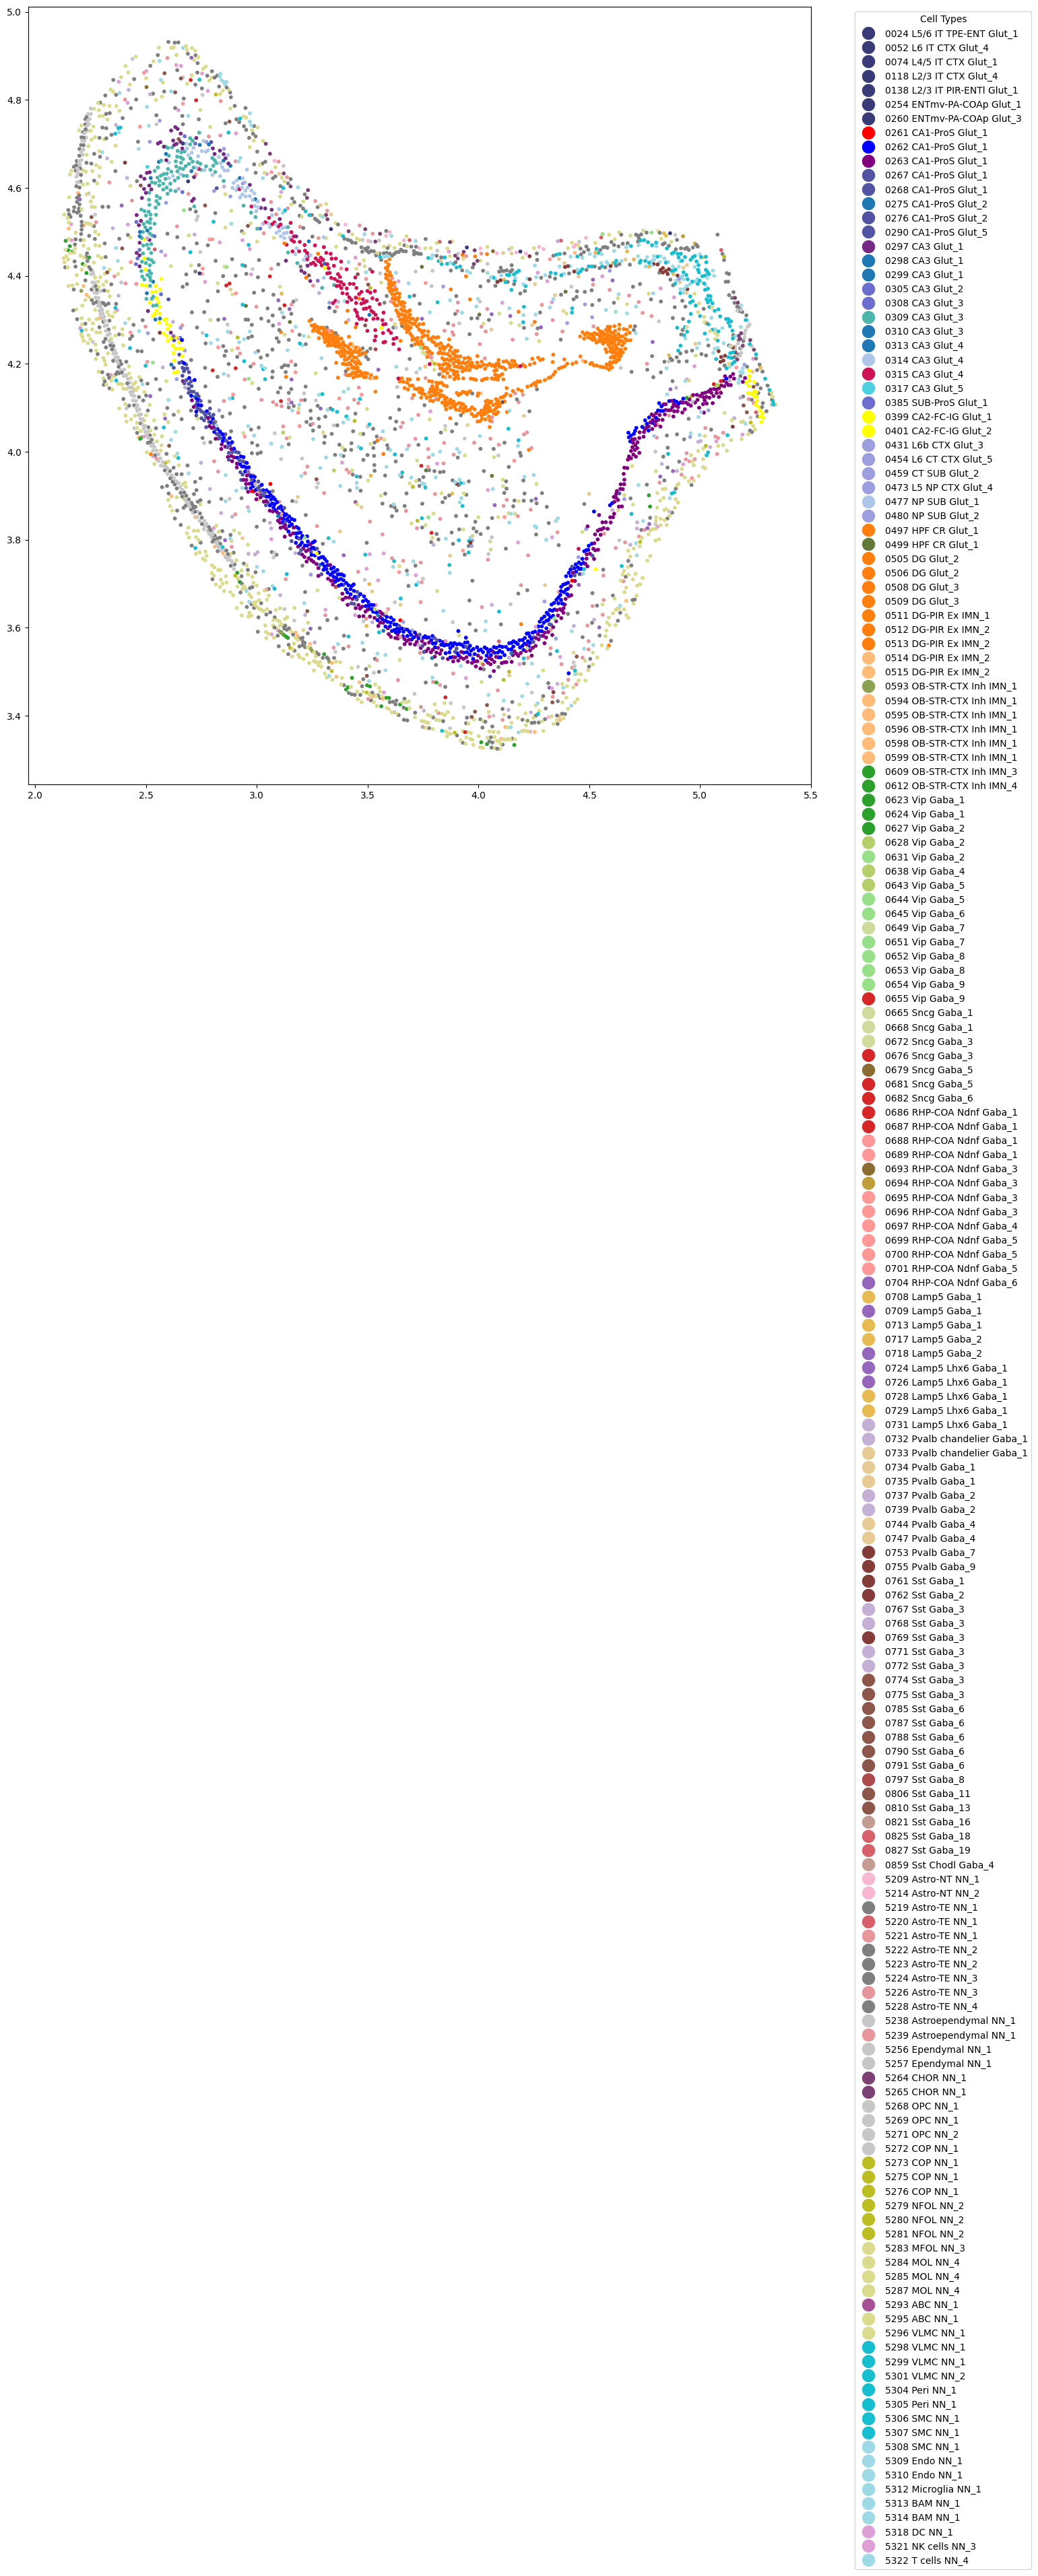

In [7]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
predicted_labels = st_data.obs['predicted_classes']
unique_clusters = np.unique(st_data.obs['cluster'])
unique_predictions = np.unique(st_data.obs['predicted_classes'])

cmap_clusters = plt.get_cmap('tab20', len(unique_clusters))
cmap_predictions = plt.get_cmap('tab20b', len(unique_predictions))  # 使用不同的颜色映射确保多样性

color_map = {label: cmap_clusters(i) for i, label in enumerate(unique_clusters)}
color_map.update({label: cmap_predictions(i) for i, label in enumerate(unique_predictions) if label not in color_map})

special_colors = {
    '0261 CA1-ProS Glut_1': 'red',
    '0262 CA1-ProS Glut_1': 'blue',
    '0263 CA1-ProS Glut_1': 'purple',
    '0399 CA2-FC-IG Glut_1': 'yellow',
    '0401 CA2-FC-IG Glut_2': 'yellow',
    '0297 CA3 Glut_1': '#762A83',
    '0309 CA3 Glut_3': '#4DB6AC',
    '0315 CA3 Glut_4': '#CE1256',
    '0317 CA3 Glut_5': '#4DD0E1'
}
color_map.update(special_colors)

colors = [color_map[label] for label in st_data.obs['predicted_classes']]
subset_color_map = {label: color_map[label] for label in unique_predictions if label in color_map}

coor_x = st_data.obs['x']
coor_y = st_data.obs['y']

plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=10)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in subset_color_map.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
